## Preprocesamiento de Datos y PCA

## Objetivos

1. Conocer el concepto de preprocesamiento de datos.
2. Identificar y tratar outliers.
3. Comprender la importancia de graficar los datos.
4. Introducir el análisis de datos ausentes.
5. Incorporar las componentes principales.

In [2]:
# Importación de Librerias básica:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

# Preprocesado y modelado:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# Visualización:
import matplotlib.style as style
style.use('seaborn')

C:\Users\andre\AppData\Local\Temp\ipykernel_20268\2836702207.py:15: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn')


## 1. Outliers


Hay casos donde algunos valores están “demasiado” alejados de la masa de datos central. Esto puede ser indicador de alguna situación anómala, o bien puede ser simplemente un dato mal cargado. En todos los casos es conveniente identificar estos datos extremos, a los que denominamos valores anómalos u outliers, y tomar acciones en consecuencia a partir de su detección.

### 1.1. Outliers en más de una dimensión

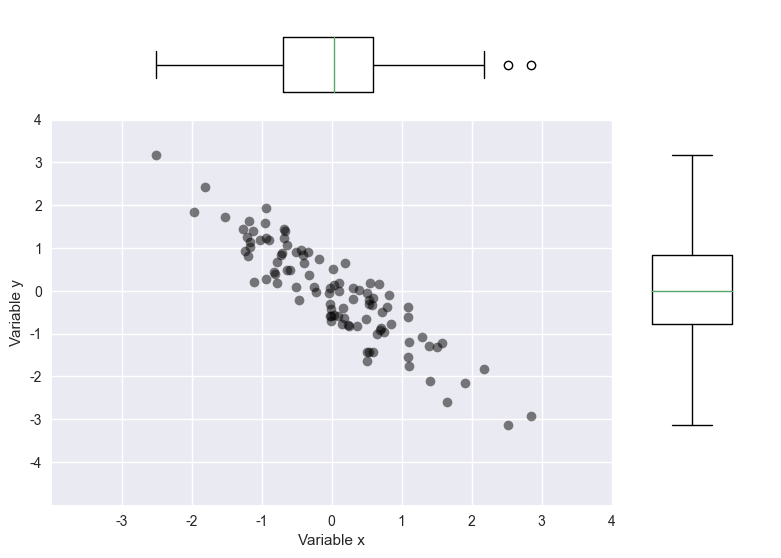

In [3]:
np.random.seed(153)

x_data = np.random.randn(100)
y_data = -x_data + np.random.randn(100)*0.5

df = pd.DataFrame()
df['vcnt'] = x_data
df['ecnt'] = y_data

left = 0.1
bottom = 0.1
top = 0.8
right = 0.8
main_ax = plt.axes([left,bottom,right-left,top-bottom])

# create axes to the top and right of the main axes and hide them
top_ax = plt.axes([left,top,right - left,1-top])
plt.axis('off')
right_ax = plt.axes([right,bottom,1-right,top-bottom])
plt.axis('off')
main_ax.plot(df['vcnt'],  df['ecnt'], 'ko', alpha=0.5)

tcksx = main_ax.get_xticks()
tcksy = main_ax.get_yticks()

right_ax.boxplot(df['ecnt'], positions=[0], notch=False, widths=1.)
top_ax.boxplot(df['vcnt'], positions=[0], vert=False, notch=False, widths=1.)

main_ax.set_yticks(tcksy) # pos = tcksy
main_ax.set_xticks(tcksx) # pos = tcksx
main_ax.set_yticklabels([int(j) for j in tcksy])
main_ax.set_xticklabels([int(j) for j in tcksx])
main_ax.set_ylim([min(tcksy-1),max(tcksy)])
main_ax.set_xlim([min(tcksx-1),max(tcksx)])
main_ax.set_xlabel('Variable x')
main_ax.set_ylabel('Variable y')

# Limites para los ejes del Boxplot
top_ax.set_xlim(main_ax.get_xlim())
top_ax.set_ylim(-1,1)
right_ax.set_ylim(main_ax.get_ylim())
right_ax.set_xlim(-1,1)
plt.show()